In [2]:
import numpy as np
#Matplotlib that provides a set of tools for creating various types of plots.
#The pyplot module is particularly convenient for creating plots.
import matplotlib.pyplot as plt
#give plots a consistent and polished look.
plt.style.use("seaborn")

In [3]:
# Data Generate X,Y
def generateDataset(m):
    #generates an array of m random numbers
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 5*noise
    return X,y
X,y = generateDataset(100)
#X.shape returns a tuple representing the dimensions of the array X
print(X.shape,y.shape)

(100,) (100,)


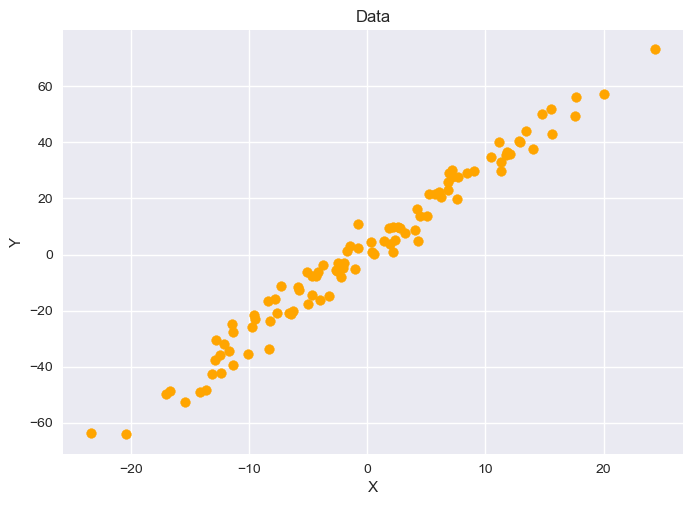

In [4]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

In [17]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

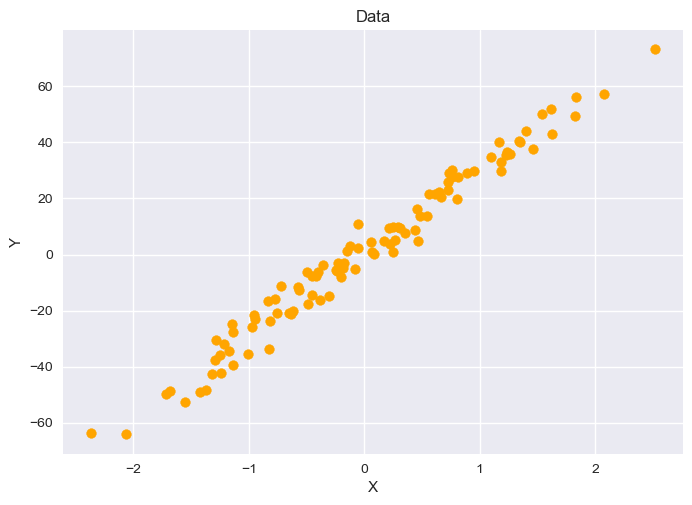

In [19]:
X = normaliseData(X)
plotData(X,y)

In [8]:
#split:The proportion of the data to be included in the training set.
#The default value is 0.8, which means 80% of the data will be used for 
#training, and the remaining 20% will be used for testing.
def trainTestSplit(X,y, split=0.8):
    #calculates the number of rows (samples) in the array X
    m = X.shape[0]
    #creates a 2D NumPy array data filled with zeros
    #m is the number of rows(data points),and 2 is the number of columns.
    data = np.zeros((m,2))
    #assigning to first colunm.
    data[:,0] = X
    #assigning to second column.
    data[:,1] = y

    np.random.shuffle(data)

    split = int(m*split)
    #extracting the first column of the array data up to the split index along the rows
    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT,yT,Xt,yt
XT,yT,Xt,yt = trainTestSplit(X,y)
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


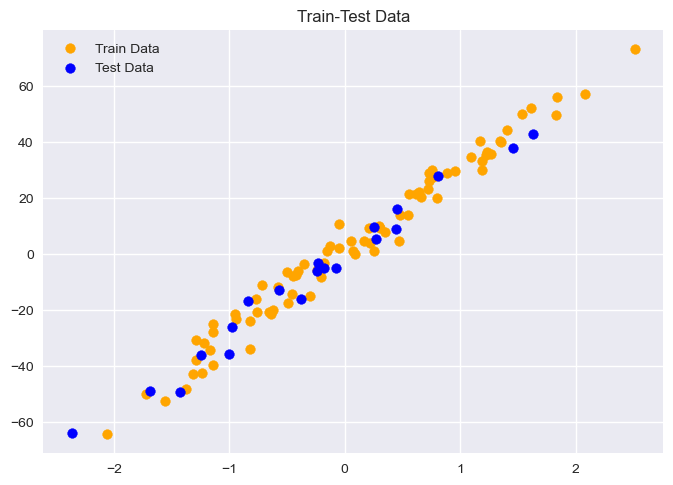

In [22]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.title("Train-Test Data")
#labeling the specified labels
plt.legend()
plt.show()

In [10]:
# Modelling
def hypothesis(X,theta):
    return theta[0] + theta[1]*X

In [11]:
def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2

    return e/(2*m)

In [12]:
def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]

    return grad/m

array([ 0.88882653, 29.29177353])

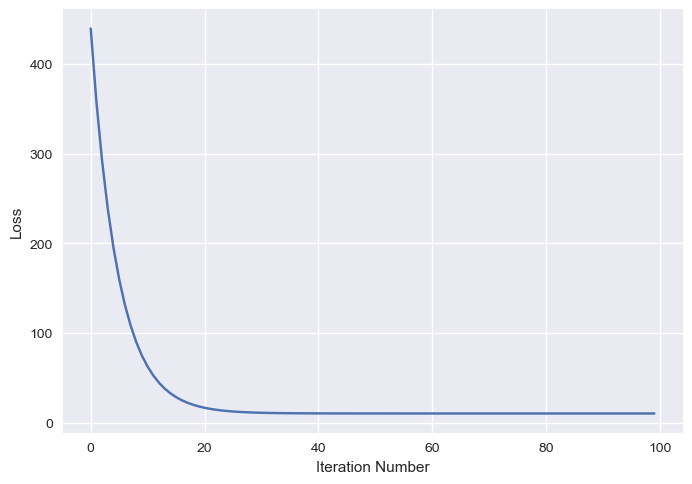

In [13]:
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta
theta = train(X,y)
theta

In [14]:
def predict(X,theta):
    return hypothesis(X,theta)

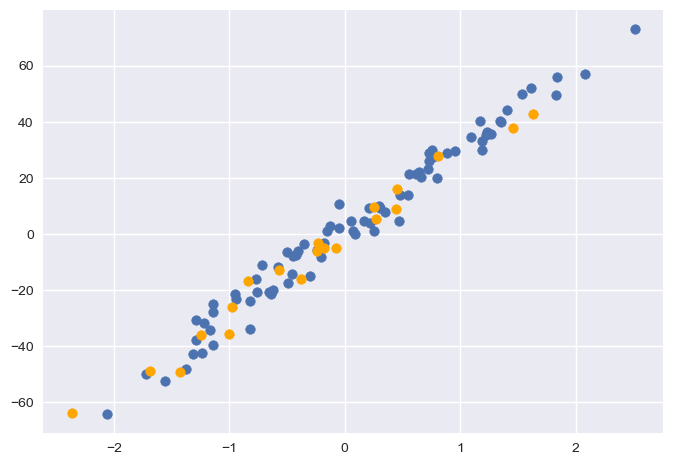

In [15]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

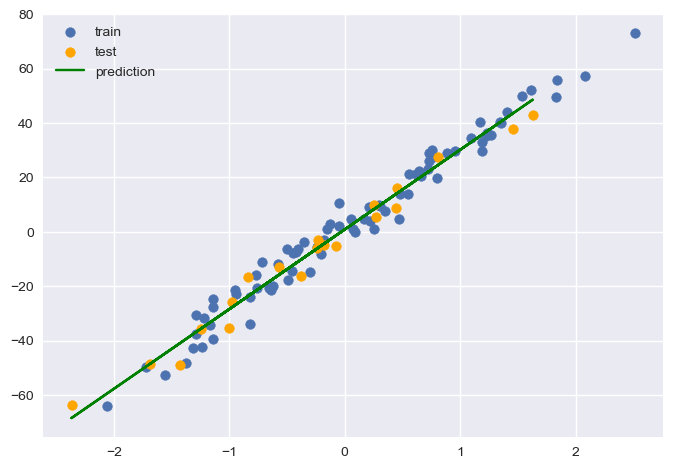

In [16]:
yp = predict(Xt,theta)
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()